# 1. Setup et installation des dépendances

In [ ]:
# pip install tensorflow tensorflow-gpu opencv-python matplotlib
# !pip install keras

In [ ]:
# !pip list

In [ ]:
import keras
import tensorflow as tf
from keras import layers, models
import os

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
import cv2
import imghdr

# 2. Extraction et Filtrage des images

In [ ]:
# !unzip Accident.zip
# !unzip 'Non Accident.zip'

In [ ]:
data_dir = 'data'

In [ ]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [ ]:
os.listdir(data_dir)

['Non Accident', 'Accident']

In [ ]:
image_exts[0]

'jpeg'

In [ ]:
for image_class in os.listdir(data_dir):
  print(image_class)

Non Accident
Accident


In [ ]:
img = cv2.imread(os.path.join(data_dir, 'Accident', 'test10_11.jpg'))

In [ ]:
img.shape

(720, 1280, 3)

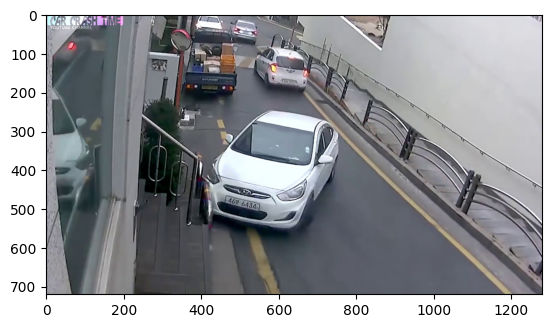

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        # Vérifie si l'image est un fichier
        if os.path.isfile(image_path):
            try:
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)
                if tip not in image_exts:
                    print('Image pas dans la liste des exts {}'.format(image_path))
                    os.remove(image_path)
            except Exception as e:
                print('Probleme avec image {}'.format(image_path))
                # os.remove(image_path)

# 3. Chargement des données

In [ ]:
tf.data.Dataset??

In [ ]:
import numpy as np

In [ ]:
tf.keras.utils.image_dataset_from_directory??

In [ ]:
data = keras.utils.image_dataset_from_directory(data_dir, batch_size=32, image_size=(256, 256), shuffle = True)

Found 880 files belonging to 2 classes.


In [ ]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
batch

(array([[[[229.28125, 230.     , 251.28125],
          [237.46875, 219.     , 243.1875 ],
          [226.28125, 228.8125 , 246.1875 ],
          ...,
          [148.09375, 156.09375, 177.09375],
          [138.     , 146.     , 169.     ],
          [125.     , 136.     , 158.     ]],
 
         [[225.28125, 234.4375 , 247.5625 ],
          [230.71875, 246.78125, 253.59375],
          [223.71875, 249.1875 , 253.3125 ],
          ...,
          [147.     , 153.5625 , 175.28125],
          [143.71875, 151.71875, 174.71875],
          [131.4375 , 139.4375 , 162.4375 ]],
 
         [[232.0625 , 242.0625 , 251.53125],
          [209.875  , 254.53125, 252.53125],
          [214.     , 254.53125, 253.53125],
          ...,
          [146.     , 152.     , 176.     ],
          [144.     , 150.     , 174.     ],
          [136.53125, 144.53125, 167.53125]],
 
         ...,
 
         [[ 14.78125,  19.3125 ,   0.     ],
          [119.75   , 126.75   ,  93.21875],
          [ 68.5    ,  76.5   

In [ ]:
batch = data_iterator.next()

In [ ]:
batch[0].shape

(32, 256, 256, 3)

In [ ]:
keras.utils.image_dataset_from_directory('data', batch_size=8, image_size=(256, 256))

Found 880 files belonging to 2 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
#class 0 = accident
#class 1 = non accident
batch[1]

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int32)

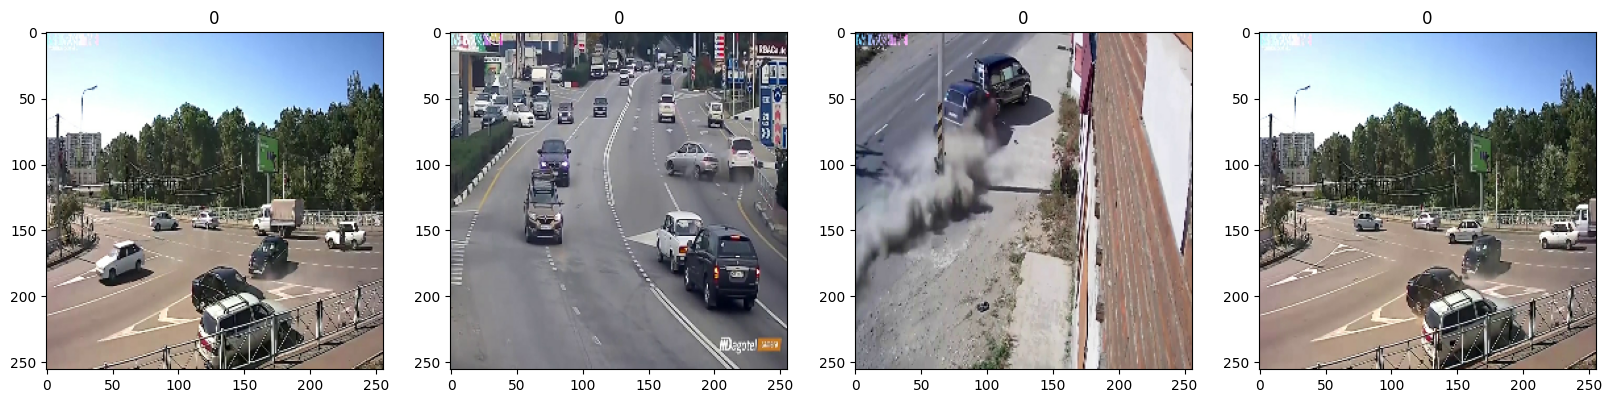

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale des données

In [ ]:
scaled = batch[0] / 255

In [ ]:
scaled.min()

np.float32(0.0)

In [ ]:
data = data.map(lambda x, y: (x / 255, y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
scaled_iterator.next()

(array([[[[1.25000002e-02, 7.84313753e-02, 7.47549022e-03],
          [1.12254903e-01, 1.47549018e-01, 6.29901960e-02],
          [1.46936268e-01, 1.49387255e-01, 8.62745121e-02],
          ...,
          [1.16176471e-01, 2.59803925e-02, 3.55392159e-03],
          [5.26348054e-01, 4.40073520e-01, 3.96936268e-01],
          [4.55637246e-01, 3.65441173e-01, 3.34068626e-01]],
 
         [[1.10294123e-03, 7.21813738e-02, 2.18137261e-02],
          [2.17769608e-01, 3.93504888e-01, 4.00367647e-01],
          [2.53063738e-01, 4.24387246e-01, 4.31250006e-01],
          ...,
          [1.34558827e-01, 4.71813716e-02, 8.45588278e-03],
          [3.42769593e-01, 2.50857830e-01, 2.02696085e-01],
          [2.61519611e-01, 1.67401955e-01, 1.22549020e-01]],
 
         [[5.19607849e-02, 1.42156869e-01, 7.94117674e-02],
          [4.52083319e-01, 7.55024493e-01, 8.33700955e-01],
          [4.70098048e-01, 7.75980413e-01, 8.20710778e-01],
          ...,
          [1.55269608e-01, 6.89950958e-02, 2.5857

In [ ]:
batch = scaled_iterator.next()

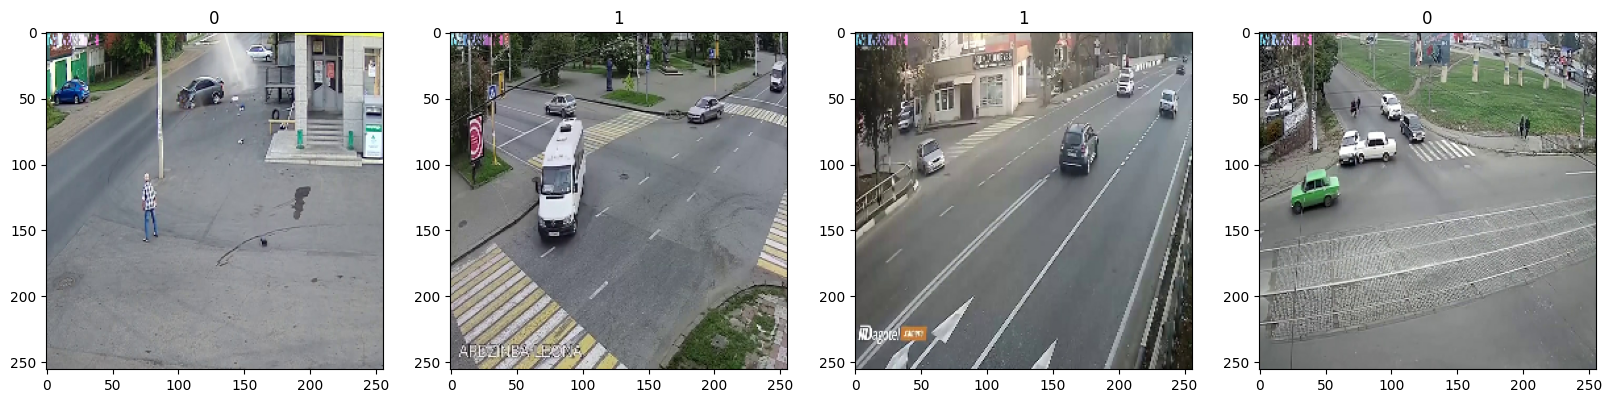

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
batch[0].max()

np.float32(1.0)

# 5. Split des données

In [ ]:
len(data)

28

In [ ]:
train_ds = int(len(data) * 0.7)
val_ds = int(len(data) * 0.2)+1
test_ds = int(len(data) * 0.1)+1

In [ ]:
test_ds+val_ds+train_ds

28

# 6. Construction du modèle

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Rescaling, BatchNormalization

model = Sequential()
model.add(Rescaling(1./255, input_shape=(256, 256,3)))
model.add(BatchNormalization())


model.add(Conv2D(16, (3, 3), 1,  activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3), 1,  activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(16, (3, 3), 1,  activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
# early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_6 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256, 256, 3)    │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     1,843,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,853,181 (7.07 MB)

 Trainable params: 1,853,175 (7.07 MB)

 Non-trainable params: 6 (24.00 B)

# 7. Entrainement

In [ ]:
logdir = 'logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(data.take(train_ds), epochs=50, validation_data=data.skip(train_ds).take(val_ds), callbacks=[tensorboard_callback])

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 294ms/step - accuracy: 0.6322 - loss: 0.6737 - val_accuracy: 0.6562 - val_loss: 0.6912
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 425ms/step - accuracy: 0.6219 - loss: 0.6272 - val_accuracy: 0.3073 - val_loss: 0.6943
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 326ms/step - accuracy: 0.6929 - loss: 0.5893 - val_accuracy: 0.3698 - val_loss: 0.6942
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 387ms/step - accuracy: 0.7075 - loss: 0.5857 - val_accuracy: 0.2865 - val_loss: 0.6966
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 324ms/step - accuracy: 0.7457 - loss: 0.5133 - val_accuracy: 0.3594 - val_loss: 0.6967
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 438ms/step - accuracy: 0.7747 - loss: 0.4420 - val_accuracy: 0.3542 - val_loss: 0.6967
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 430ms/step - accuracy: 0.8103 - loss: 0.4543 - val_accuracy: 0.3385 - val_loss: 0.6977
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 331ms/step - accuracy: 0.8147 - loss: 0.4169 - val_accuracy: 0

# 8. Performance

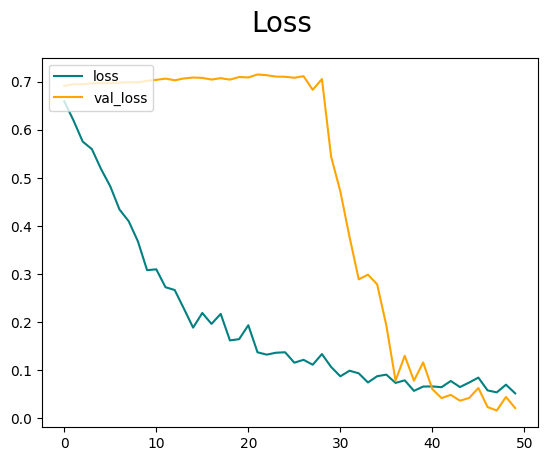

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

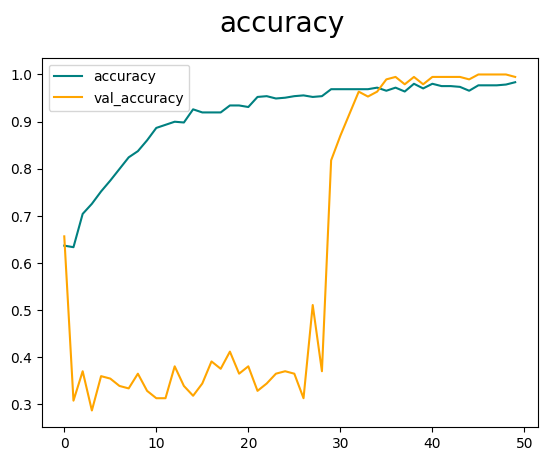

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluation

In [ ]:
from keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
test_data = data.skip(train_ds + val_ds)

for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


In [ ]:
print(f"Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}")

Precision: 0.9642857313156128, Recall: 1.0, Accuracy: 0.987500011920929


# 10. Test

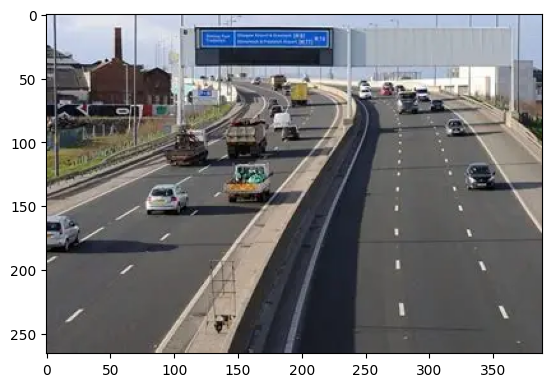

In [ ]:
img = cv2.imread('no_crash5.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

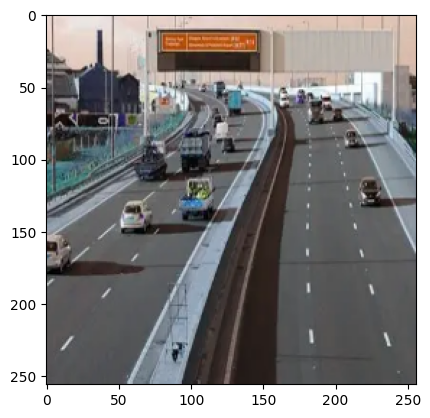

In [ ]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
resize.shape

TensorShape([256, 256, 3])

In [ ]:
np.expand_dims(resize, 0)

array([[[[250.4414  , 234.18164 , 228.18164 ],
         [238.20703 , 221.98633 , 215.98633 ],
         [233.4649  , 217.4649  , 211.45908 ],
         ...,
         [232.9863  , 206.9863  , 190.97261 ],
         [233.95663 , 207.95232 , 191.9371  ],
         [233.9414  , 207.92188 , 191.92188 ]],

        [[250.41096 , 234.16641 , 228.16641 ],
         [238.18117 , 221.97339 , 215.97339 ],
         [232.53947 , 216.53947 , 210.25815 ],
         ...,
         [231.91225 , 205.91225 , 189.23465 ],
         [231.4536  , 205.24582 , 188.51219 ],
         [230.76562 , 203.82422 , 187.82422 ]],

        [[249.89651 , 233.89651 , 227.89651 ],
         [237.74408 , 221.74408 , 215.74408 ],
         [231.70541 , 215.70541 , 209.67624 ],
         ...,
         [225.63269 , 199.63269 , 183.2654  ],
         [226.19916 , 200.19916 , 184.19916 ],
         [226.90234 , 200.90234 , 184.90234 ]],

        ...,

        [[ 91.36912 ,  90.62888 ,  93.36912 ],
         [ 84.66211 ,  83.88281 ,  85.88281 ]

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


In [ ]:
yhat

array([[0.99625057]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is Non Accident')
else:
    print(f'Predicted class is Accident')

Predicted class is Non Accident
